In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.shape

(200, 5)

In [ ]:
data_processed = data.drop('CustomerID', axis=1)
data_processed = pd.get_dummies(data_processed, columns=['Gender'], drop_first=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)
print(pd.DataFrame(data_scaled, columns=data_processed.columns).head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801     1.128152
1 -1.281035           -1.738999                1.195704     1.128152
2 -1.352802           -1.700830               -1.715913    -0.886405
3 -1.137502           -1.700830                1.040418    -0.886405
4 -0.563369           -1.662660               -0.395980    -0.886405


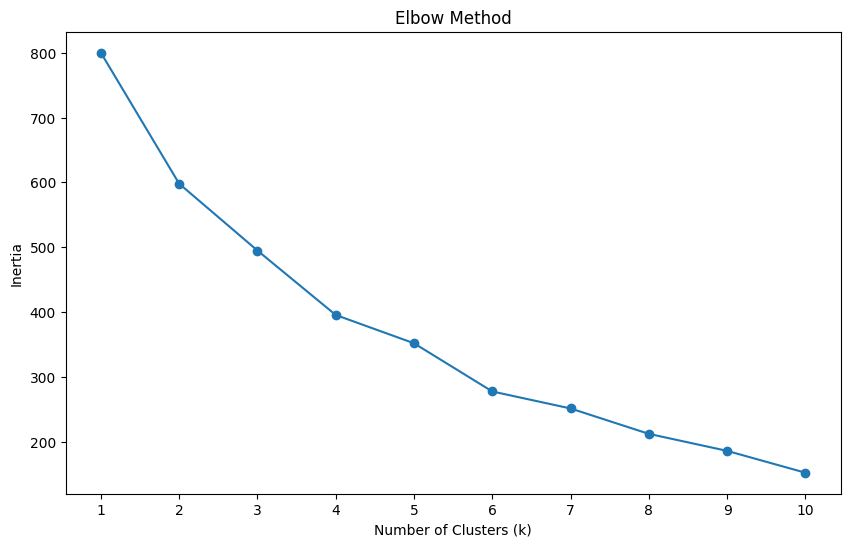

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range) # To show all k values on x-axis
plt.show()

In [ ]:
k=3
kmeans=KMeans(n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        2  
2        0  
3        2  
4        0  


In [ ]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'silhouette_score:{sil_score}')

silhouette_score:0.2576199805135528


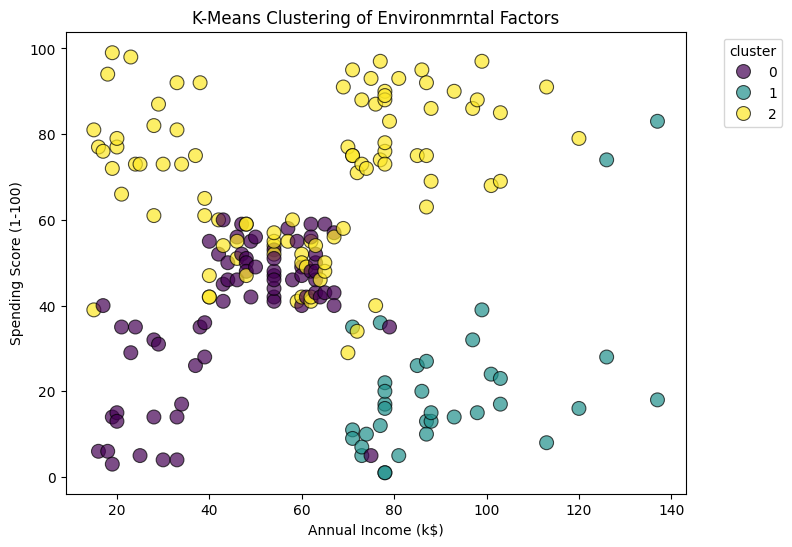

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',
                data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-Means Clustering of Environmrntal Factors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

In [ ]:
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


In [ ]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'silhouette_score:{sil_score}')

silhouette_score:0.2719102346618833


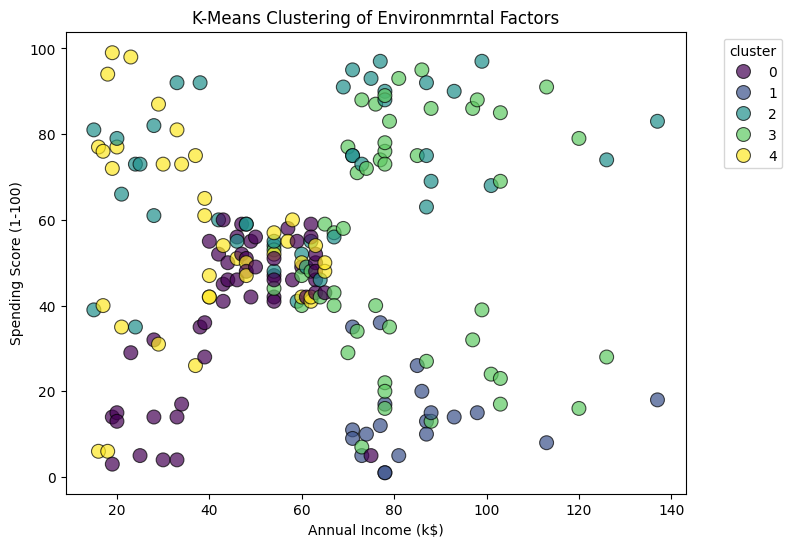

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',
                data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-Means Clustering of Environmrntal Factors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()